# Challenge - Unsupervised Divorce

---
![](https://images.unsplash.com/photo-1551811040-f13e57351ef3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

## Instructions

Try to predict divorce using the following features, **without the final label**:

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

In [3]:
# TODO : imports
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('DivorceUnsup').getOrCreate()

In [3]:
# TODO : SparkSession

*Q1*: Import the `divorce.csv` file and display the first 3 rows.

In [6]:
# TODO
df = spark.read.csv('../input/divorce.csv', header=True, inferSchema=True, sep=';')

*Q2*: We now suppose that the label 'Class' is not present and that it's a fully unsupervised approach. Fit a K-Means with N-clusters on 75% train data. How many clusters did you choose? Why?

In [7]:
# TODO
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.pipeline import Pipeline

train_df = df.sampleBy('Class', fractions={0:0.75, 1:0.75})
test_df = df.subtract(train_df)

assembler = VectorAssembler(inputCols=df.drop('Class').columns, outputCol='features')

kmeans = KMeans(featuresCol='features', k=2)

pipe = Pipeline(stages=[assembler, kmeans])

In [9]:
model = pipe.fit(train_df)

*Q3*: Make predictions on the test set.

In [10]:
# TODO
predictions = model.transform(test_df)

*Q4*: Evaluate the coherence of the clustering by computing the Silhouette Score. Read quickly about it: https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [11]:
# TODO
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)

In [12]:
silhouette

0.8158565498378425

*Q5*: Is the score high? Low? How do you interpret it?

In [13]:
# TODO

#Score is high and the model seems to be pretty accurate.

*Q6*: Compute the cluster centers using the `.clusterCenters()` of your model, and plot histograms of the cluster centers to support the separability of the data.

In [15]:
# TODO
clusters = model.stages[1].clusterCenters()

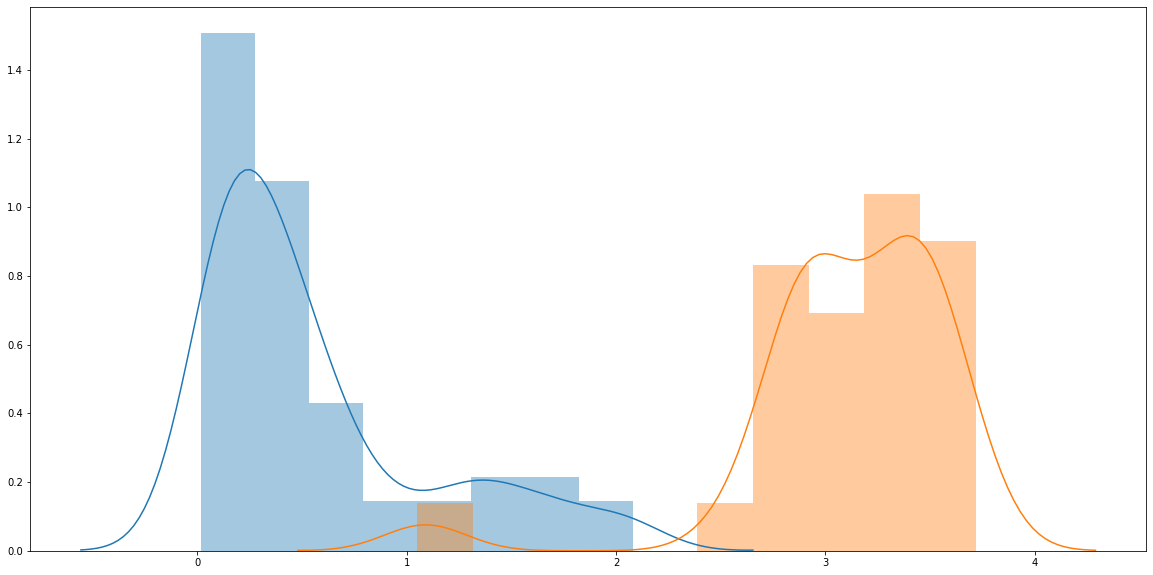

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.distplot(clusters[0])
sns.distplot(clusters[1])
plt.show()